In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

In [2]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
sales.shape

(113036, 18)

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [5]:
sales['Customer_Age'].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: Customer_Age, dtype: float64

<AxesSubplot:title={'center':'Distribution of unit cost'}, ylabel='Density'>

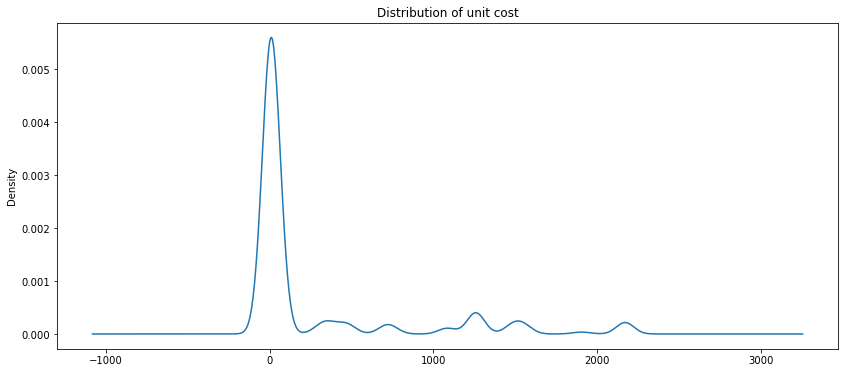

In [6]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6), title='Distribution of unit cost')

<AxesSubplot:>

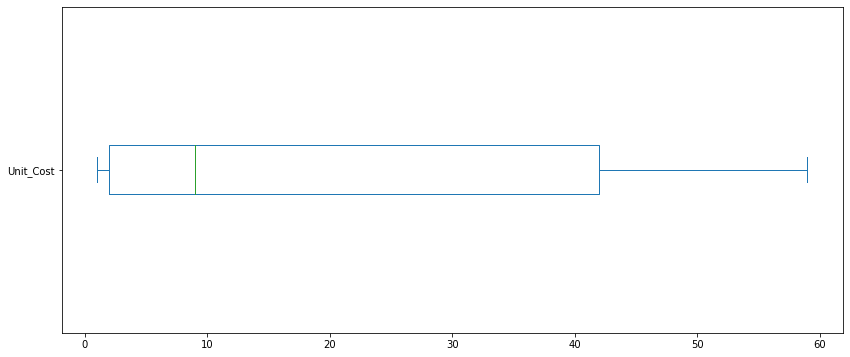

In [7]:
#boxplot of unit costs
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6), sym='')

In [8]:
sales['Customer_Age'].value_counts()

31    4382
34    4300
29    4214
32    4092
28    3988
      ... 
86       8
80       6
76       6
87       6
82       4
Name: Customer_Age, Length: 70, dtype: int64

Text(0.5, 1.0, "Age_Group's chart")

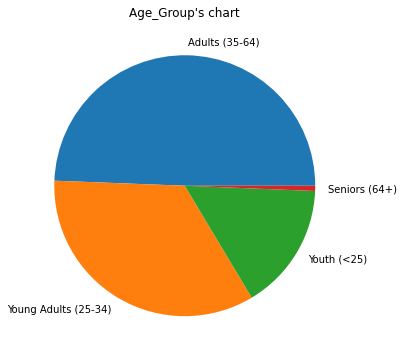

In [9]:
plt.figure(facecolor='white')
#plot showing percentage of people splitted into Age_group on pie chart 
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6), ylabel = '')
plt.title('Age_Group\'s chart')

In [10]:
sales['Unit_Price'].describe()

count    113036.000000
mean        452.938427
std         922.071219
min           2.000000
25%           5.000000
50%          24.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

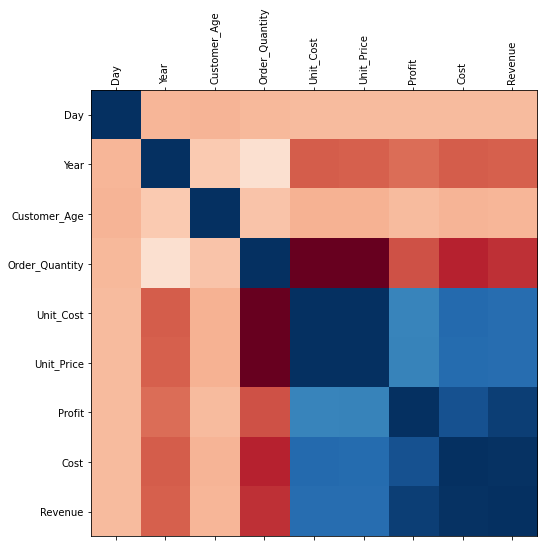

In [11]:
corr = sales.corr()
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
#pink ~ 0, dark blue ~ 1.0
plt.show()

In [12]:
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot:title={'center':'Distribution of customer age'}, ylabel='Density'>

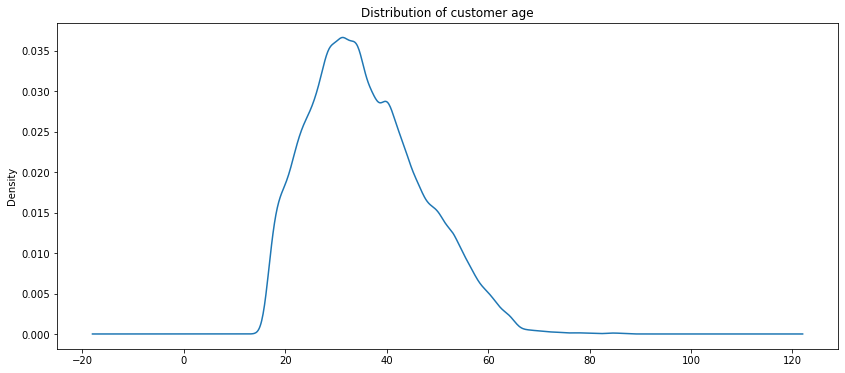

In [13]:
#check the distribution of customer age
sales['Customer_Age'].plot(kind='kde', figsize=(14,6), title = 'Distribution of customer age')

<AxesSubplot:title={'center':'Distribution of order quantinty'}, ylabel='Frequency'>

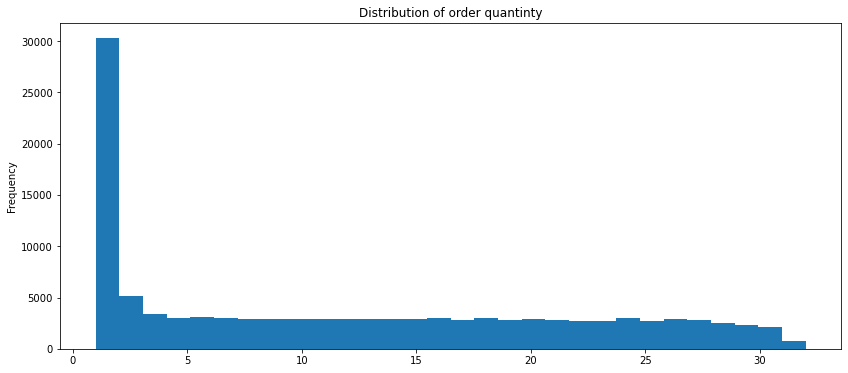

In [14]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6), title='Distribution of order quantinty')

In [15]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Company activities in the following years'}>

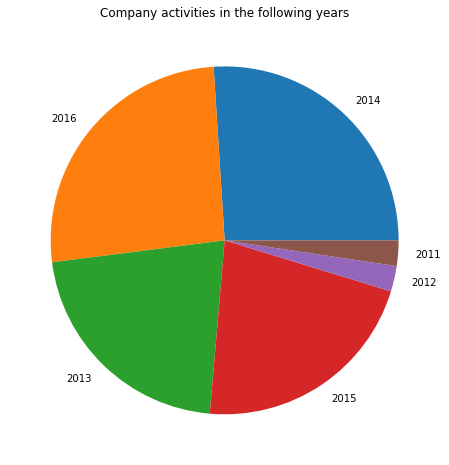

In [16]:
plt.figure(facecolor='white')
plt.title('Company activities in the following years')
sales['Year'].value_counts().plot(kind='pie', figsize=(8,8), ylabel='')

<AxesSubplot:title={'center':'Sales per country'}>

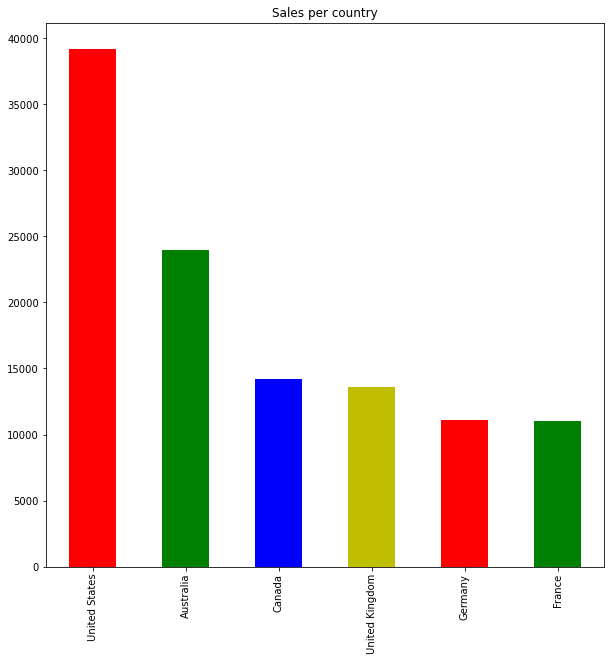

In [17]:
#Which country has the most sales quantity of sales?
sales['Country'].value_counts().plot(kind='bar', color = ['r', 'g', 'b', 'y'], figsize=(10,10), title='Sales per country')

In [18]:
sales['Country'].describe()

count            113036
unique                6
top       United States
freq              39206
Name: Country, dtype: object

In [19]:
sales['Revenue_per_age'] = sales['Revenue'] / sales['Customer_Age']

In [20]:
sales['Revenue_per_age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_age, dtype: float64

<AxesSubplot:title={'center':'Revenue per people age distribution'}, ylabel='Density'>

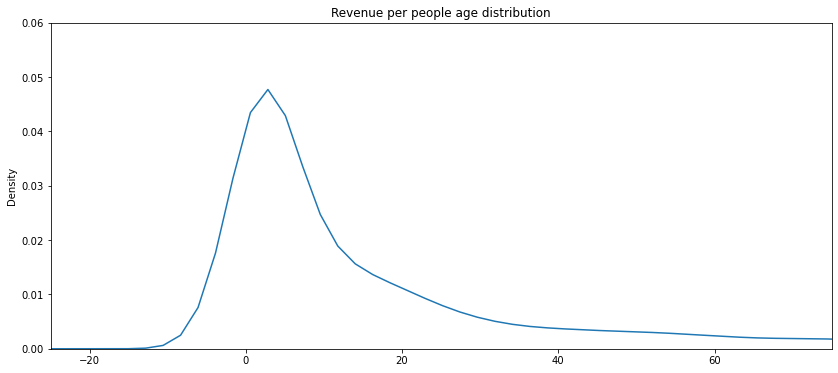

In [21]:
sales['Revenue_per_age'].plot(kind='density', xlim=(-25, 75), ylim=(0.00, 0.06), figsize=(14,6), title = 'Revenue per people age distribution')

In [22]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [23]:
#multiply all values by 1.03
sales['Unit_Price'] *= 1.03

In [24]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

In [25]:
sales['State'].describe()

count         113036
unique            53
top       California
freq           22450
Name: State, dtype: object

In [26]:
sales.loc[sales['State'] == 'Kentucky'] #allows you to select and isolate a given row/column by a given 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142,96,238,5.950
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165,112,277,6.925
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30.90,32,22,54,1.350
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30.90,336,231,567,14.175
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30.90,16,11,27,0.675
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30.90,288,198,486,12.150


In [27]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

In [28]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


In [29]:
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [30]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
#option to change the display of the date
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [31]:
france = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<BarContainer object of 16 artists>

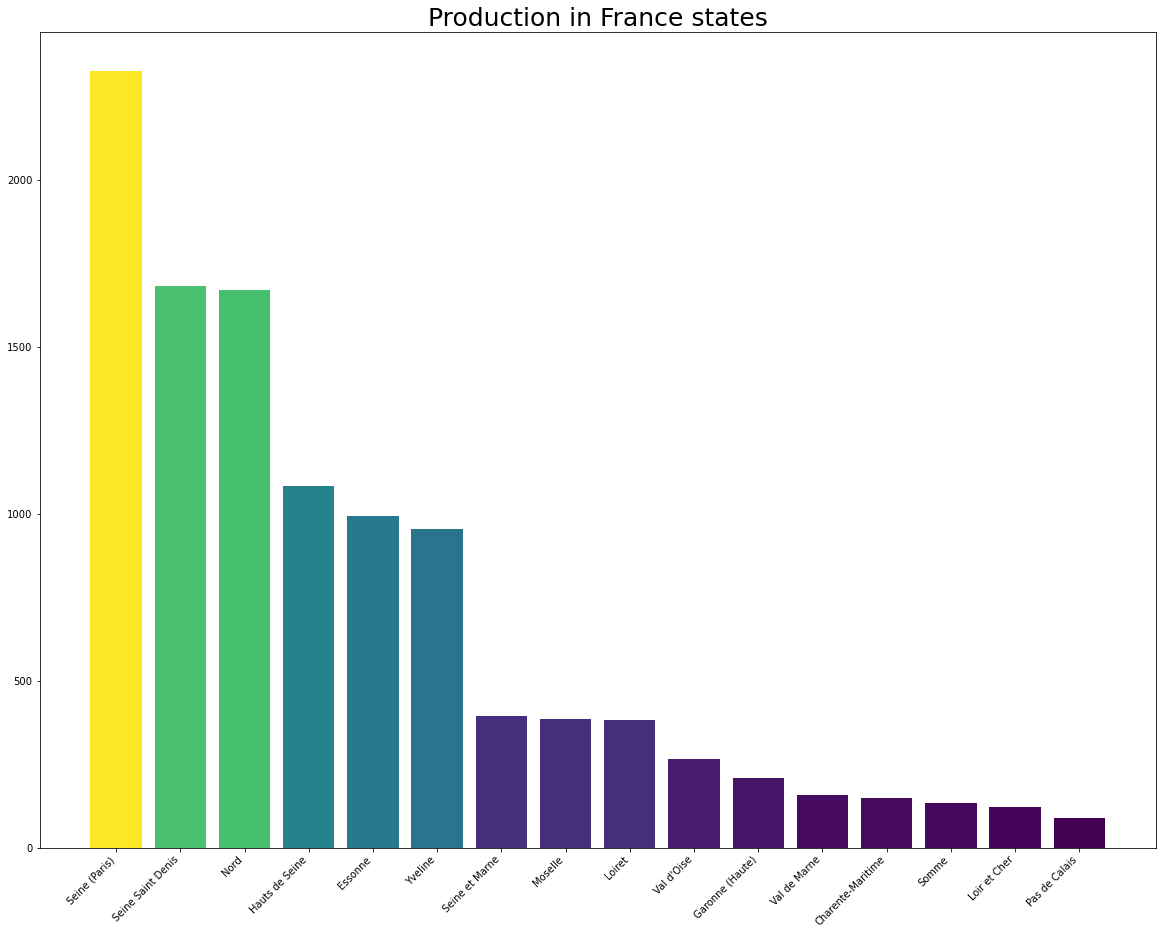

In [32]:
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.figure(figsize=[20, 15])
fontsize = 25
plt.title('Production in France states', fontsize=fontsize)
plt.xticks(rotation=45, ha="right")
plt.bar(france.keys(), france, color=my_cmap(rescale(france)))

In [33]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot:title={'center':'Product category shown as % of of total items produced'}>

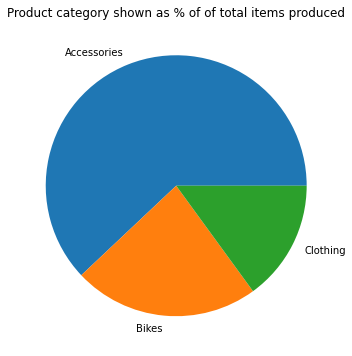

In [34]:
plt.figure(facecolor='white')
plt.title('Product category shown as % of of total items produced')
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6), ylabel='')


In [35]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

8

In [36]:
sales.sort_values(['Revenue'], ascending = False).head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_age,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2455.52,15096,42978,58074,1116.807692,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2455.52,14055,40014,54069,1039.788462,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3685.34,5628,8684,14312,650.545455,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3685.34,5485,8684,14169,322.022727,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3685.34,5485,8684,14169,745.736842,2011-09-30
70699,2011-07-17,17,July,2011,30,Young Adults (25-34),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3685.34,5485,8684,14169,472.300000,2011-07-17
70597,2011-05-12,12,May,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3685.34,5485,8684,14169,745.736842,2011-05-12
70745,2011-02-11,11,February,2011,39,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 52",4,2171,3685.34,5485,8684,14169,363.307692,2011-02-11
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3685.34,5485,8684,14169,488.586207,2011-03-20
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3685.34,5485,8684,14169,544.961538,2011-07-05
